In [2]:
import numpy as np 
import pandas as pd 
from os import path
from PIL import Image

import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

# Importing TextBlob
from textblob import TextBlob

In [3]:
recruitment = pd.read_csv("Recruitment.csv")

recruitment.head()

,Year,Q1_Awareness,Q2_Influence,Q3_Recruitment_OE,Q4_Program,Q5_Catalog
0,2020,1,1,I knew it would provide we with opportunities ...,1,1
1,2020,1,1,Knowing that there is a school on campus is un...,0,1
2,2020,1,1,I thought that it would help me in deciding wh...,0,1
3,2020,1,1,I loved the idea that i was going to be able t...,1,1
4,2020,1,1,I thought it was a really good hands on experi...,1,1


In [4]:
#drop method
recruitment = recruitment.drop(recruitment[recruitment.Q3_Recruitment_OE == '-1'].index)
recruitment.to_csv('recruitment.csv', index=False)

In [5]:
recruitment.dtypes

Year                  int64
Q1_Awareness          int64
Q2_Influence          int64
Q3_Recruitment_OE    object
Q4_Program            int64
Q5_Catalog            int64
dtype: object

In [6]:
recruitment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               126 non-null    int64 
 1   Q1_Awareness       126 non-null    int64 
 2   Q2_Influence       126 non-null    int64 
 3   Q3_Recruitment_OE  126 non-null    object
 4   Q4_Program         126 non-null    int64 
 5   Q5_Catalog         126 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 6.0+ KB


In [7]:
recruitment.describe()

,Year,Q1_Awareness,Q2_Influence,Q4_Program,Q5_Catalog
count,126.000000,126.0,126.000000,126.000000,126.0
mean,2021.666667,1.0,0.960317,0.801587,1.0
std,1.152389,0.0,0.195992,0.400397,0.0
min,2020.000000,1.0,0.000000,0.000000,1.0
25%,2021.000000,1.0,1.000000,1.000000,1.0
50%,2022.000000,1.0,1.000000,1.000000,1.0
75%,2023.000000,1.0,1.000000,1.000000,1.0
max,2023.000000,1.0,1.000000,1.000000,1.0


<Axes: >

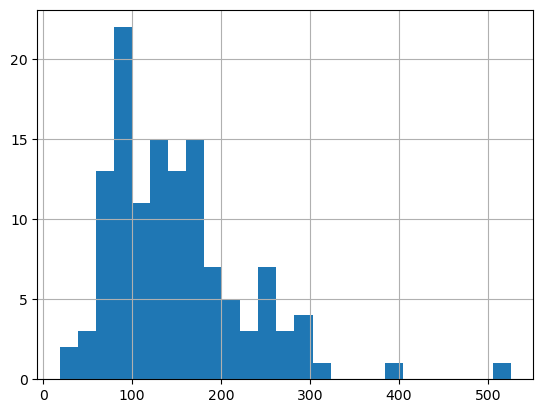

In [8]:
seq_length = [len(i) for i in recruitment['Q3_Recruitment_OE']]

pd.Series(seq_length).hist(bins = 25)

In [9]:
# remove special characters from text column
recruitment.Q3_Recruitment_OE = recruitment.Q3_Recruitment_OE.str.replace('[#,@,&]', '')
#Remove twitter handlers
recruitment.Q3_Recruitment_OE = recruitment.Q3_Recruitment_OE.str.replace('@[^\s]+','')
#Remove digits
recruitment.Q3_Recruitment_OE = recruitment.Q3_Recruitment_OE.str.replace(' \d+ ','')
# remove multiple spaces with single space
recruitment.Q3_Recruitment_OE = recruitment.Q3_Recruitment_OE.str.replace("http\S+", "")
# remove multiple spaces with single space
recruitment.Q3_Recruitment_OE = recruitment.Q3_Recruitment_OE.str.replace('\s+', ' ')
#remove all single characters
recruitment.Q3_Recruitment_OE = recruitment.Q3_Recruitment_OE.str.replace(r'\s+[a-zA-Z]\s+', '')

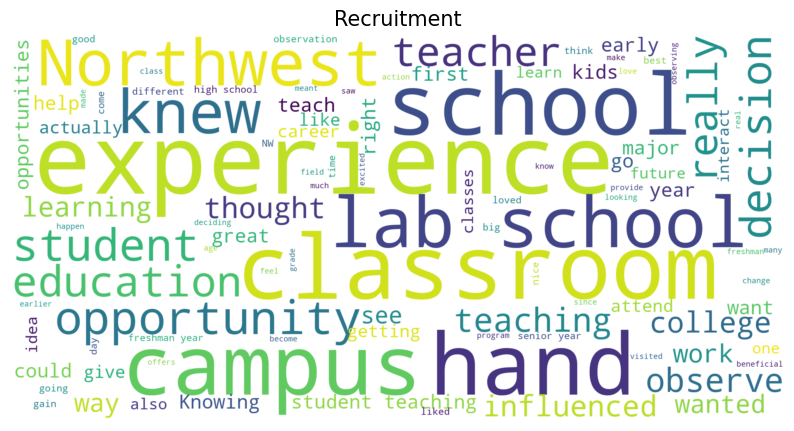

In [9]:
# Get stopwords
# Define nltk stopwords in english
stop_words = stopwords.words('english')
stop_words.extend(['would', 'get', 'able','ha', 'wa', '-'])

# Get a string of tweets 
recruitment_text = ",".join(recruitment.Q3_Recruitment_OE)

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, 
                      max_words=100, 
                      stopwords=stop_words,
                      scale=5,
                      background_color="white").generate(recruitment_text)

# Display the generated image:
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Recruitment',fontsize=15)
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'school'),
  Text(1, 0, 'experience'),
  Text(2, 0, 'classroom'),
  Text(3, 0, 'lab'),
  Text(4, 0, 'student'),
  Text(5, 0, 'opportunity'),
  Text(6, 0, 'hand'),
  Text(7, 0, 'northwest'),
  Text(8, 0, 'knew'),
  Text(9, 0, 'campus')])

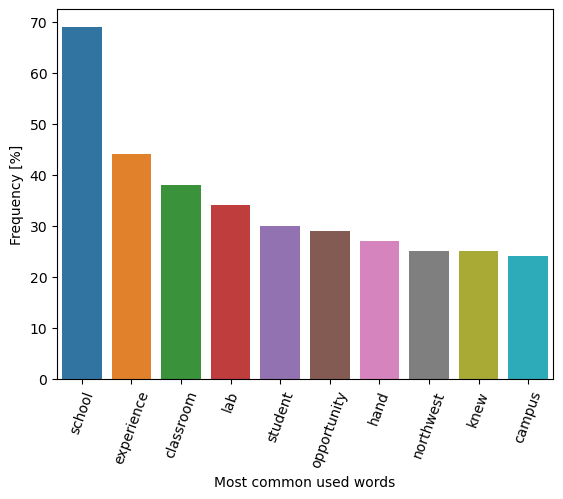

In [16]:
# lemmatize text column by using a lemmatize function
def lemmatize_text(Q3_Recruitment_OE):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(Q3_Recruitment_OE.lower())]


# Initialize the Lemmatizer and Whitespace Tokenizer
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

# Lemmatize words
recruitment['lemmatized'] = recruitment.Q3_Recruitment_OE.apply(lemmatize_text)
recruitment['lemmatized'] = recruitment['lemmatized'].apply(lambda x: [word for word in x if word not in stop_words])

# use explode to expand the lists into separate rows
wf_recruitment = recruitment.lemmatized.explode().to_frame().reset_index(drop=True)

# plot dfe
sns.countplot(x='lemmatized', data=wf_recruitment, order=wf_recruitment.lemmatized.value_counts().iloc[:10].index)
plt.xlabel('Most common used words')
plt.ylabel('Frequency [%]')
plt.xticks(rotation=70)

In [17]:
recruitment['polarity'] = recruitment.Q3_Recruitment_OE.apply(lambda x: TextBlob(x).polarity)
recruitment['subjectivity'] = recruitment.Q3_Recruitment_OE.apply(lambda x: TextBlob(x).subjectivity)

recruitment.head()

,Year,Q1_Awareness,Q2_Influence,Q3_Recruitment_OE,Q4_Program,Q5_Catalog,lemmatized,polarity,subjectivity
0,2020,1,1,I knew it would provide we with opportunities ...,1,1,"[knew, provide, opportunity, college, would., ...",0.045833,0.316667
1,2020,1,1,Knowing that there is a school on campus is un...,0,1,"[knowing, school, campus, unlike, school, visi...",0.041500,0.538500
2,2020,1,1,I thought that it would help me in deciding wh...,0,1,"[thought, help, deciding, whether, still, like...",0.000000,0.000000
3,2020,1,1,I loved the idea that i was going to be able t...,1,1,"[loved, idea, going, classroom, work, kid, fre...",0.600000,0.712500
4,2020,1,1,I thought it was a really good hands on experi...,1,1,"[thought, really, good, hand, experience, actu...",0.350000,0.350000


In [19]:
recruitment['sentiment'] = np.where(recruitment.polarity > 0, 'positive', 
                                 np.where(recruitment.polarity < 0, 'negative', 'neutral'))
recruitment.head()

,Year,Q1_Awareness,Q2_Influence,Q3_Recruitment_OE,Q4_Program,Q5_Catalog,lemmatized,polarity,subjectivity,sentiment
0,2020,1,1,I knew it would provide we with opportunities ...,1,1,"[knew, provide, opportunity, college, would., ...",0.045833,0.316667,positive
1,2020,1,1,Knowing that there is a school on campus is un...,0,1,"[knowing, school, campus, unlike, school, visi...",0.041500,0.538500,positive
2,2020,1,1,I thought that it would help me in deciding wh...,0,1,"[thought, help, deciding, whether, still, like...",0.000000,0.000000,neutral
3,2020,1,1,I loved the idea that i was going to be able t...,1,1,"[loved, idea, going, classroom, work, kid, fre...",0.600000,0.712500,positive
4,2020,1,1,I thought it was a really good hands on experi...,1,1,"[thought, really, good, hand, experience, actu...",0.350000,0.350000,positive


In [20]:
recruitment.nlargest(5,'polarity')['Q3_Recruitment_OE']

65     The lab school influenced my decision to atten...
84     The lab school impacted my decision to attend ...
52     It is a great and convenient way to gain exper...
121    I saw it as a great opportunity to get experie...
12     I enjoy the opportunity to get hands-on experi...
Name: Q3_Recruitment_OE, dtype: object

In [21]:
recruitment['sentiment'].value_counts()

sentiment
positive    103
neutral      17
negative      6
Name: count, dtype: int64

In [22]:
from sklearn.preprocessing import LabelBinarizer

# LabelBinarize sentiment column and merge with recruitment DF
lb = LabelBinarizer()

sentbinarized = lb.fit_transform(recruitment['sentiment']).tolist()
#lb.classes_ # Classes of the LabelBinarizer

dfbinarized = pd.DataFrame(sentbinarized, columns=lb.classes_)
recruitment[dfbinarized.columns] = dfbinarized
recruitment.head()

,Year,Q1_Awareness,Q2_Influence,Q3_Recruitment_OE,Q4_Program,Q5_Catalog,lemmatized,polarity,subjectivity,sentiment,negative,neutral,positive
0,2020,1,1,I knew it would provide we with opportunities ...,1,1,"[knew, provide, opportunity, college, would., ...",0.045833,0.316667,positive,0,0,1
1,2020,1,1,Knowing that there is a school on campus is un...,0,1,"[knowing, school, campus, unlike, school, visi...",0.041500,0.538500,positive,0,0,1
2,2020,1,1,I thought that it would help me in deciding wh...,0,1,"[thought, help, deciding, whether, still, like...",0.000000,0.000000,neutral,0,1,0
3,2020,1,1,I loved the idea that i was going to be able t...,1,1,"[loved, idea, going, classroom, work, kid, fre...",0.600000,0.712500,positive,0,0,1
4,2020,1,1,I thought it was a really good hands on experi...,1,1,"[thought, really, good, hand, experience, actu...",0.350000,0.350000,positive,0,0,1


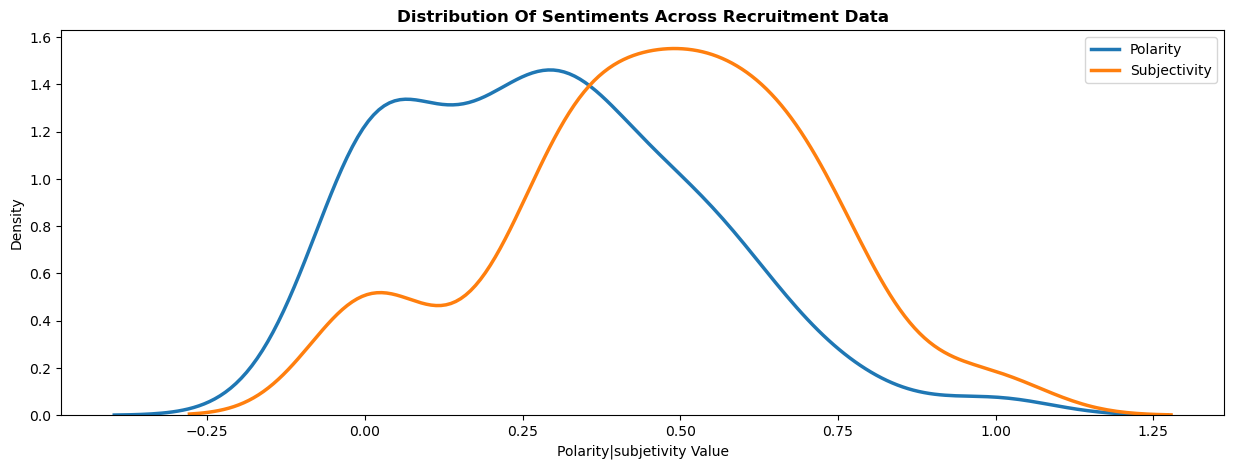

In [23]:
plt.figure(figsize=(15,5))
plt.title('Distribution Of Sentiments Across Recruitment Data',fontsize=12,fontweight='bold')
sns.kdeplot(recruitment['polarity'], label='Polarity', lw=2.5)
sns.kdeplot(recruitment['subjectivity'], label='Subjectivity', lw=2.5)
plt.xlabel('Polarity|subjetivity Value', fontsize=10)
plt.ylabel('Density', fontsize=10)
# Display the generated image:

plt.legend()
plt.show()


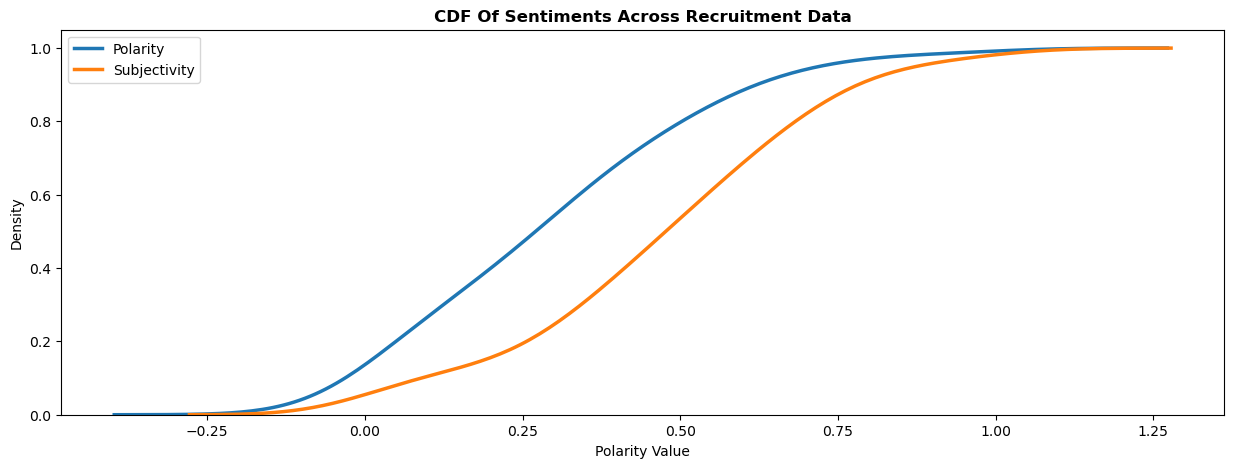

In [24]:
plt.figure(figsize=(15,5))
plt.title('CDF Of Sentiments Across Recruitment Data',fontsize=12, fontweight='bold')
sns.kdeplot(recruitment['polarity'],cumulative=True, label='Polarity',lw=2.5)
sns.kdeplot(recruitment['subjectivity'],cumulative=True, label='Subjectivity',lw=2.5)
plt.xlabel('Polarity Value', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.legend()
plt.show()